In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix ,accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile   , chi2 
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB


In [114]:
df=pd.read_csv('mobilePriceRange.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [116]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [117]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
print(x.shape ,y.shape)

(2000, 20) (2000,)


In [118]:
selector=SelectPercentile(score_func=chi2,percentile=30)
newX=selector.fit_transform(x,y)
print(newX.shape ,y.shape)

(2000, 6) (2000,)


In [119]:
selectedColumns=selector.get_feature_names_out().tolist()
print(x.head())
x=pd.DataFrame(columns=selectedColumns,data=newX)
print(x.head())


   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2         20       756  2549     9     7         19   
1        136        3   6        905      1988  2631    17     3          7   
2        145        5   6       1263      1716  2603    11     2          9   
3        131        6   9       1216      1786  2769    16     8         11   
4        141        2  14       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  
0        0 

In [120]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=0, shuffle =True)
print('x_train shape is ' , x_train.shape)
print('y_train shape is ' , y_train.shape)
print('x_test shape is ' , x_test.shape)
print('y_test shape is ' , y_test.shape)

x_train shape is  (1200, 6)
y_train shape is  (1200,)
x_test shape is  (800, 6)
y_test shape is  (800,)


In [121]:
classifier = GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [122]:
y_pred=classifier.predict(x_test)
confusionMatrix= confusion_matrix(y_test,y_pred)

In [123]:
print("Accuracy Score on test data: ", accuracy_score(y_true=y_test, y_pred=y_pred))
print(confusionMatrix)

Accuracy Score on test data:  0.80375
[[183  22   0   0]
 [ 18 134  35   0]
 [  0  34 134  31]
 [  0   0  17 192]]


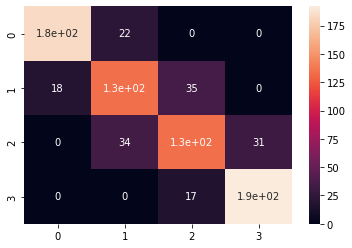

In [124]:
sns.heatmap(confusionMatrix,annot=True)
plt.show()

In [125]:
x

,battery_power,int_memory,mobile_wt,px_height,px_width,ram
0,842.0,7.0,188.0,20.0,756.0,2549.0
1,1021.0,53.0,136.0,905.0,1988.0,2631.0
2,563.0,41.0,145.0,1263.0,1716.0,2603.0
3,615.0,10.0,131.0,1216.0,1786.0,2769.0
4,1821.0,44.0,141.0,1208.0,1212.0,1411.0
...,...,...,...,...,...,...
1995,794.0,2.0,106.0,1222.0,1890.0,668.0
1996,1965.0,39.0,187.0,915.0,1965.0,2032.0
1997,1911.0,36.0,108.0,868.0,1632.0,3057.0
1998,1512.0,46.0,145.0,336.0,670.0,869.0


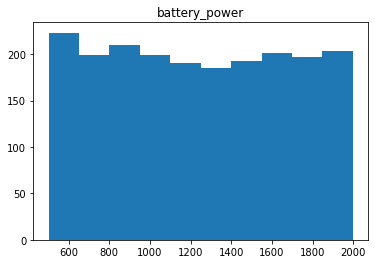

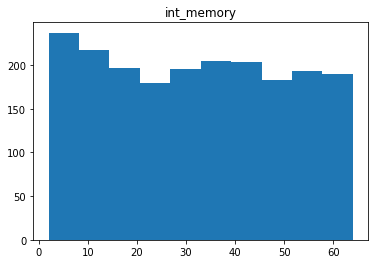

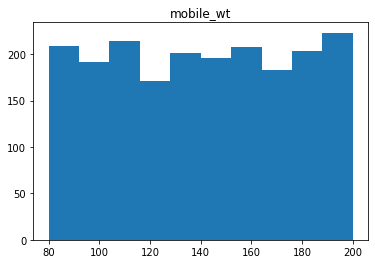

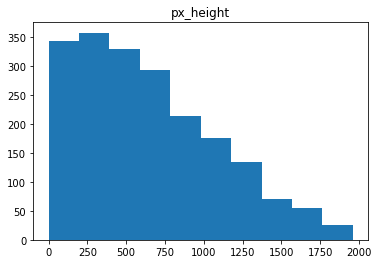

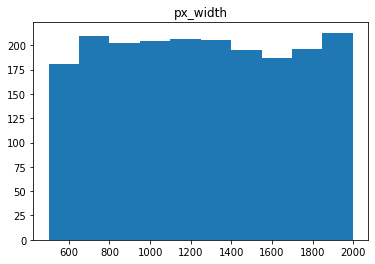

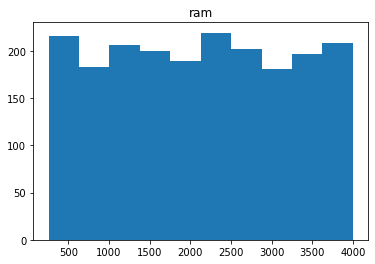

In [126]:
for i in range(x.shape[1]):
    plt.hist(x.iloc[:,i])
    plt.title(x.columns[i])
    plt.show()


In [131]:
classifier = MultinomialNB(alpha=0.5)
classifier.fit(x_train,y_train)

MultinomialNB(alpha=0.5)

In [132]:
y_pred=classifier.predict(x_test)
print("Accuracy Score on test data: ", accuracy_score(y_true=y_test, y_pred=y_pred))


Accuracy Score on test data:  0.50625
